# 住宅情報の分析

エイムズ市の住宅価格

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。


住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。

この中のtrain.csvを使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。


## 【問題1】データセットの取得

pd.read_csv()を使用して、変数に格納してください。


In [2]:
print('Hello')

# print(sns.__version__)
from sklearn.datasets import load_iris
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


train_df = pd.read_csv("train.csv")

# df = pd.read_csv('/content/drive/MyDrive/DIC/train.csv')

# プリント関数だと綺麗に表示されない
# print(train_df)
display(train_df)

Hello


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 【問題2】データセット自体の調査


KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。


### 　回答
アイオワ州エイムズ市の住宅1460件分のデータセット
各住宅データの価格や販売年や販売月を始め、細かな部屋数や設備グレードまで揃ったデータセットです。


## 【問題3】データの確認

データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。


**1.各特徴量がどういったものかを見る。（数値データか文字データなど）**

**2.今回の目的変数はどの列か確認する。**

**3.特徴量の平均値と標準偏差、四分位数を一度に表示させる。**

### 回答

**1.各特徴量がどういったものかを見る。（数値データか文字データなど）**

#### 以下のinfo()で特徴量のデータを表示
int64 ===   数値データ


float64=== 浮動小数点（小数点の位置が固定されていない）


object ===  文字列データ


**2.今回の目的変数はどの列か確認する。**

**SalePrice**　の列



In [3]:
# print(train_df.isnull())
print(train_df.info())

# 3. 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【問題4】欠損値への対応


欠損値に関して以下のことを行い、レポートしてください。

各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。

このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。


**ResidentMario/missingno: Missing data visualization module for Python.**

**1. 各特徴量の欠損値の有無を確認する。**

**2. 欠損値が何パーセント含まれるかを確認する。**

**3. 5つ以上欠損値がある特徴量（列）は削除する。**

**4. 5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。**



以下のcolumnsの数で1460に満たない特徴量は欠損値がある
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


以下、各欠損値が何％含まれるのか(グラフの値)
MiscFeature === 97%(3%)
Fence ========87%(13%)
PoolQC=========99%(1%)
GarageQC=======8%(92%)
GarageAREA=====8%(92%)
GarageFinish=====8%(92%)
GarageYrBlt=====8%(92%)
GarageType=====8%(92%)
FireplaceQu=====42%(58%)
Alley==========96%(4%)


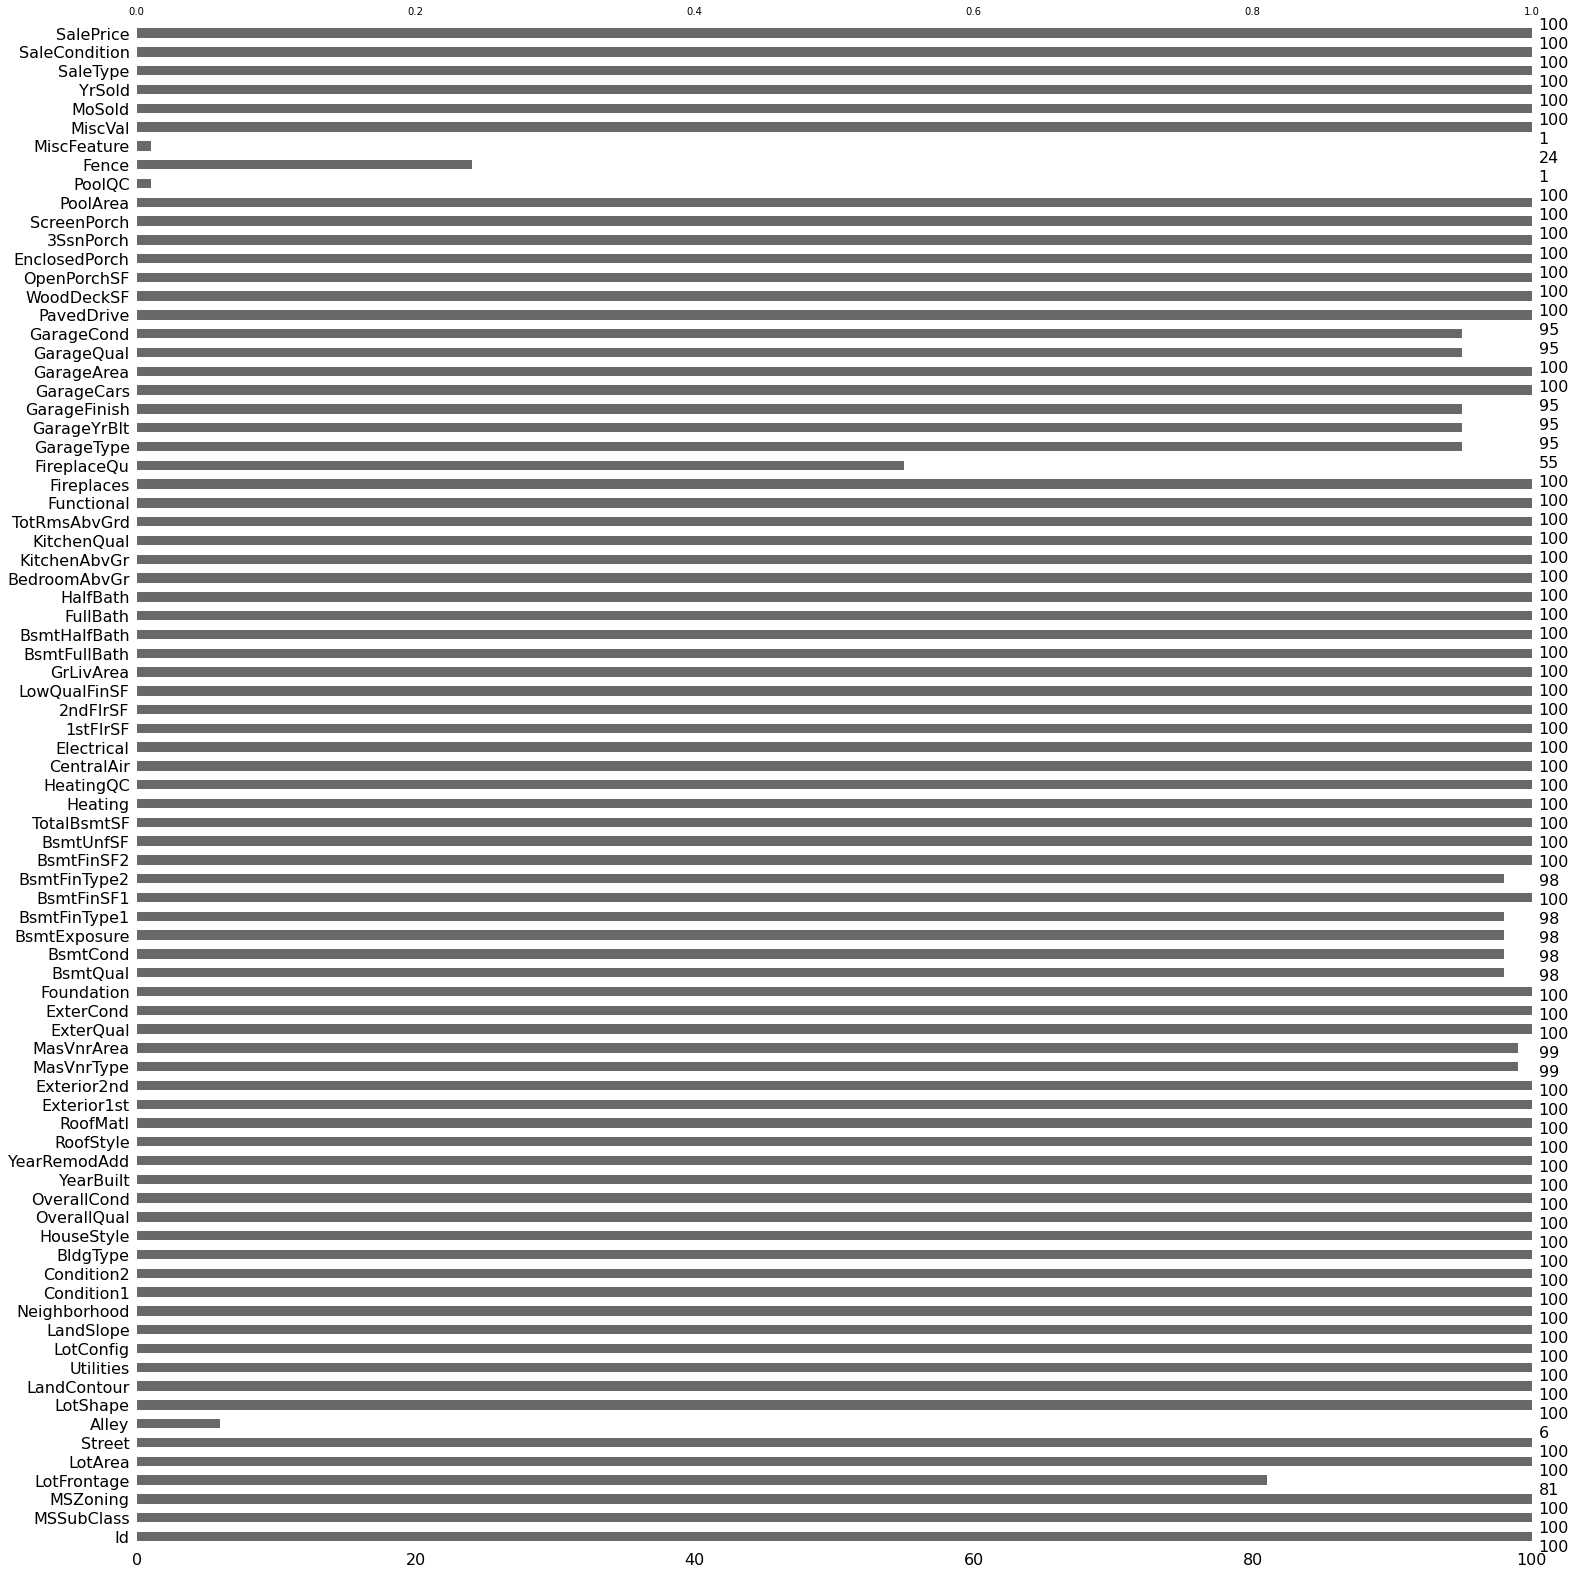

In [4]:
# 回答
# 1. 各特徴量の欠損値の有無を確認する。
print('以下のcolumnsの数で1460に満たない特徴量は欠損値がある')
print(train_df.info())
# 以下のisnullでTrueのサンプルは欠損値
display(train_df.isnull())

# 2. 欠損値が何パーセント含まれるかを確認する。
# bar===棒グラフでdataframeの欠損値を表示する（最大100％表記）
import random
random.seed(0)
# train_df.sample(n=100)
# X = X.sample(n=500)#サンプル数を5００へ絞り込み
msno.bar(train_df.sample(n=100,random_state=0))


# print(train_df["MiscFeature"])
# print(train_df["Alley"])

In [5]:
print('以下の通り、非欠損値が1455に満たない列を削除')
# 3. 5つ以上欠損値がある特徴量（列）は削除する。
# 非欠損値が1455に満たない列を削除　81columnsから63に減った
train_df_q2 = train_df.dropna(thresh=1455,axis=1)
display(train_df_q2)

以下の通り、非欠損値が1455に満たない列を削除


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [6]:
# 4. 5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。
# anyは一つでも欠損値がある場合削除する。　axis=0は無くても行を削除してくれる
train_df_q3 = train_df_q2.dropna(how='any',axis=0)
display(train_df_q3)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


## 【問題5】用語の調査

以下の２つの単語を知る必要があります。これらを調査してまとめてください。

### 尖度（せんど）
正規分布からどれだけ尖っているのか表す統計量
山の尖り度と裾の広がり度を表す指標

正規分布より尖った分布（平均付近に近い、裾が重い）ーーーこの場合は**正の値**をとる

正規分布より平たい分布（平均付近から散らばり、裾が軽い）ーーーこの場合は**負の値**をとる

正規の分布（正規分布）ーーーーーこの場合は**0**となる


### 歪度（へいど）

正規分布からどれだけ左右に歪みが生じているのか表す統計量
左右対称性を表す指標

左に偏った分布（右裾が長いなど）ーーーこの場合は**正の値**をとる

右に偏った分布（左裾が長いなど）ーーーこの場合は**負の値**をとる

左右対称の分布（正規分布）ーーーーーこの場合は**0**となる

## 【問題6】分布の確認

seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

**1. 目的変数に対して対数変換を行う。**

**2. 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。**

**3. 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。**



In [7]:
# 1. 目的変数に対して対数変換を行う。
sale_price = train_df_q3.loc[:,"SalePrice"]
# apply(np.log)で対数変換を行う
sale_price_log = sale_price.apply(np.log)
# print(sale_price_log)

In [8]:
# 2. 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
import scipy

a = np.var(train_df_q3.loc[:,"SalePrice"])
print(a)

y = scipy.stats.skew(train_df_q3.loc[:,"SalePrice"])
print("歪度は{}".format(y))

x = scipy.stats.kurtosis(train_df_q3.loc[:,"SalePrice"])
print("尖度は{}".format(x))


var = train_df.loc[:,'SalePrice'].var() #分散
kurt = train_df.loc[:,'SalePrice'].kurt() #尖度
skew = train_df.loc[:,'SalePrice'].skew() #歪度

print("分散：\n", var)
print("尖度：\n", kurt)
print("歪度：\n", skew)


6310987719.431521
歪度は1.880007613681095
尖度は6.502799105301849
分散：
 6311111264.297451
尖度：
 6.536281860064529
歪度：
 1.8828757597682129


目的変数


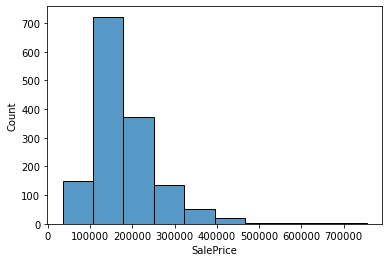

対数変換


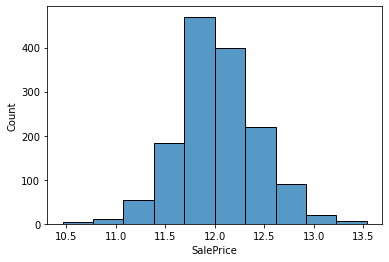

In [9]:
# 3. 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

print('目的変数')
sns.histplot(train_df_q3.loc[:,"SalePrice"],bins=10)
plt.show()

print('対数変換')
sns.histplot(sale_price_log,bins=10)
plt.show()

# 回答
# 対数変換を行うことで、以下のことがわかる。
# 1.歪度が正規分布より左に偏っている。
# 2.尖度においても平均付近にデータが集中していることが見受けられる。

## 【問題7】相関係数の確認

特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。


**1. 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。**

**2. 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。**

**3. 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。**

**4. 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。**

《補足》


重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。

このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

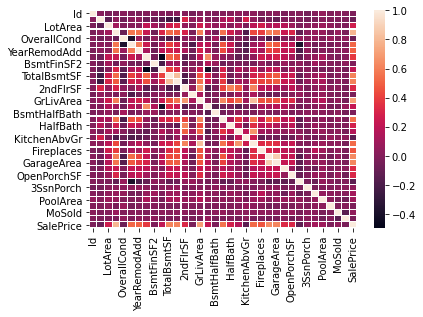

<Figure size 720x720 with 0 Axes>

In [10]:
# 1. 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

# .corr()で相関係数行列を作る
train_df_all = train_df_q3.corr()

# ヒートマップを作る
sns.heatmap(train_df_all,linewidth=0.1)
plt.figure(figsize=(10, 10))
plt.show()

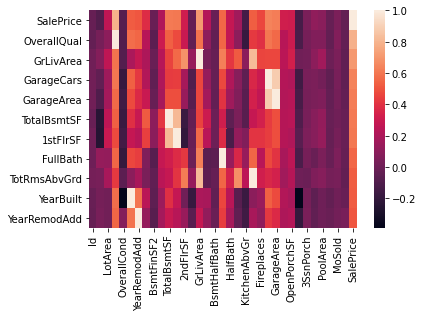

In [11]:
# 2. 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

# ★
# DataFrameやSeriesを並べ替えすることに.sort_valuesを使う。.head(11)で目的変数を含む11行目までを表示
train_df_all.sort_values(by='SalePrice', ascending=False).head(11)

# 上の相関係数行列をヒートマップへ。ascending=Falseで降順となる
sns.heatmap(train_df_all.sort_values(by='SalePrice', ascending=False).head(11))
plt.show()


# 目的変数
# print(train_df_q3.loc[:,"SalePrice"])

In [35]:
# 3. 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる
print("以下、各特徴量を日本語で記述（コメント）")
# ・OverallQual　＝＝＝　総合素材と仕上がりの品質
# ・GrLivArea　＝＝＝地上（地上）のリビングエリアの平方フィート
# ・GarageCars　＝＝＝　車の容量でのガレージのサイズ
# ・GarageArea　＝＝＝　ガレージのサイズ（平方フィート）
# ・TotalBsmtSF　＝＝＝地下室の総平方フィート
# ・1stFlrSF　＝＝＝1階平方フィート
# ・FullBath　＝＝＝グレード以上のフルバスルーム
# ・TotRmsAbvGrd　＝＝＝グレード以上の部屋の合計（バスルームは含まれません）
# ・YearBuilt　＝＝＝建設日
# ・YearRemodAdd　＝＝＝　改造日

以下、各特徴量を日本語で記述（コメント）


In [36]:
# 4. 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。
print('以下、相関関係が高い組み合わせを表示（コメント）')
# GarageCars と　GarageArea
# GrLivArea　とSalePrice（目的変数）
# TotRmsAbvGrd　と　Kitchin Ab Gr
# OverallQual　とSalePrice（目的変数）


以下、相関関係が高い組み合わせを表示（コメント）
